## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
#import the warnings.
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [3]:
df = pd.read_csv('C:/Users/hp/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
# We can see that there are no missing values in the data and Class column is signifying that a fraudulent transaction has
# taken place or not.

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [7]:
classes

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# There are 284315 transactions which are non-fraudulent in nature while 492 transactions were fraudulent transactions.

In [9]:
normal_share
# The below percentage is the normal share of transactions

99.82725143693798

In [10]:
fraud_share
# The below percentage is the fraudulent share of transactions

0.1727485630620034

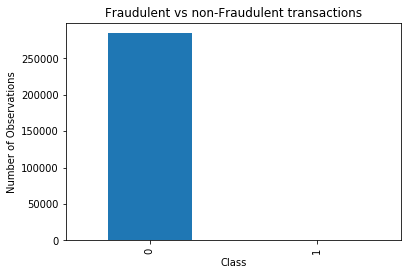

In [11]:
# fraudulent vs non-fraudulent transactions
plt.xlabel("Class")
plt.ylabel("Number of Observations")
plt.title("Fraudulent vs non-Fraudulent transactions")
df['Class'].value_counts().plot.bar()
plt.show()


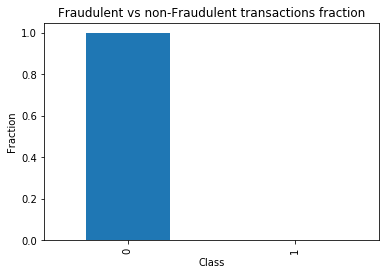

In [12]:
# fraudulent vs non-fraudulent transactions fraction
plt.xlabel("Class")
plt.ylabel("Fraction")
plt.title("Fraudulent vs non-Fraudulent transactions fraction")

df['Class'].value_counts(normalize = True).plot.bar()
plt.show()

In [13]:
df['Class'] = df['Class'].apply(str)
# Changing the datatype of columns from integer to string

In [14]:
# Checking the number of missing values and the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [15]:
# Inspecting the time column
df.Time.describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

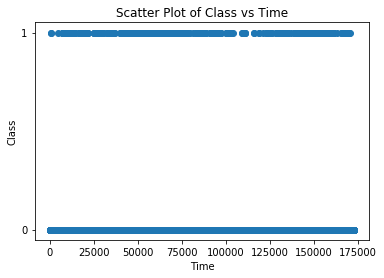

In [16]:
# Create a scatter plot to observe the distribution of classes with time
plt.xlabel("Time")
plt.ylabel("Class")
plt.title("Scatter Plot of Class vs Time")
plt.scatter(df.Time, df.Class)
plt.show()

In [17]:
# The above plot is a distribution of Classes with time. We can see that normal transactions are done throughout the time period
# while the fraudulent transactions have some gaps in the time period.

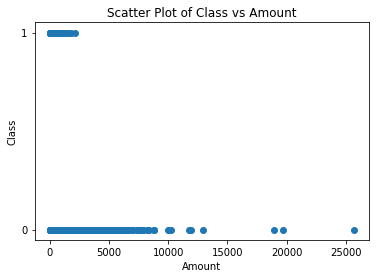

In [18]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.xlabel("Amount")
plt.ylabel("Class")
plt.title("Scatter Plot of Class vs Amount")
plt.scatter(df.Amount, df.Class)
plt.show()

In [19]:
# The above plot is a distribution of Classes with Amount.

In [20]:
# Summarizing the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


### Splitting the data into train & test data

In [21]:
# Typecasting the variable to integer

df['Class'] = df['Class'].apply(int)
#df['Class'] = df['Class'].apply(str)

In [22]:
y= df['Class']

In [23]:
# Drop unnecessary columns
X = df.drop(['Class', 'Time'],axis=1)

In [24]:
# Performing test train split using stratify sample
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size = 0.3, random_state = 100, stratify= y)

In [25]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

In [26]:
# plot the histogram of a variable from the dataset to see the skewness

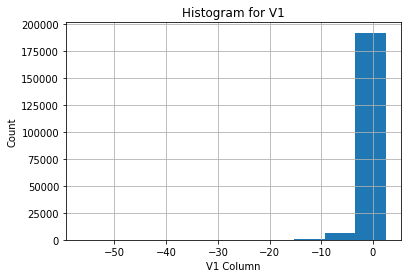

In [27]:
# Plotting the histogram of V1 to check the skewness
plt.xlabel("V1 Column")
plt.ylabel("Count")
plt.title("Histogram for V1")
X_train.V1.hist()
plt.show()

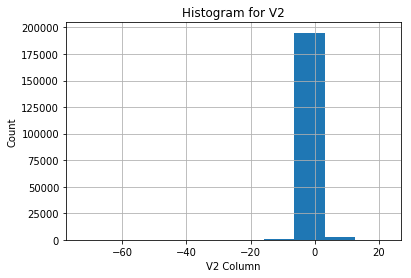

In [28]:
# Plotting the histogram of V2 to check the skewness
plt.xlabel("V2 Column")
plt.ylabel("Count")
plt.title("Histogram for V2")
X_train.V2.hist()
plt.show()

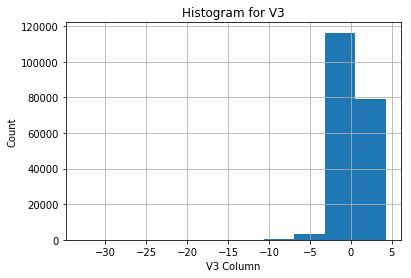

In [29]:
# Plotting the histogram of V3 to check the skewness
plt.xlabel("V3 Column")
plt.ylabel("Count")
plt.title("Histogram for V3")
X_train.V3.hist()
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [30]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

In [31]:
# Applying Power Transform
import numpy as np
from sklearn.preprocessing import PowerTransformer
pt = preprocessing.PowerTransformer(copy=False)

In [32]:
# Fitting only on X_train
print(pt.fit(X_train))

PowerTransformer(copy=False)


In [33]:
# Transformation on X_Train
pt.transform(X_train)

array([[ 1.44569155, -0.17985939, -0.82537101, ..., -0.21338865,
        -0.18593313, -1.44748939],
       [-0.1685569 ,  0.70771555, -0.415595  , ...,  0.57666235,
         0.28299091, -1.13077718],
       [ 1.54055149,  0.05920404, -1.39766213, ..., -0.23217377,
        -0.20541154, -0.86502161],
       ...,
       [ 0.44926405, -0.65653239,  0.44059444, ...,  0.09733236,
         0.20682708,  1.18854512],
       [ 0.22075551, -0.98861027,  0.05561301, ..., -0.18686459,
         0.25017814,  1.56343857],
       [-0.45562581,  0.76260283,  0.24868191, ..., -0.11534124,
        -1.54276014, -1.31557838]])

In [34]:
# Transformation on X_Test
pt.transform(X_test)

array([[-0.55395099,  0.91160093, -0.11928654, ..., -0.12977515,
         0.17955064,  0.90076267],
       [ 0.02609086,  1.26869257, -1.43424809, ...,  0.29394533,
        -0.17958052, -0.43072205],
       [ 1.44914779, -0.05637223, -0.93523866, ..., -0.05895154,
        -0.15948888, -0.40288819],
       ...,
       [ 0.40730679, -0.2662729 ,  0.14250171, ...,  0.07984482,
        -0.00433224,  0.40504099],
       [-1.78794338, -1.85749671,  1.25787403, ...,  2.06920383,
         0.27978279,  0.7051672 ],
       [-2.52591184,  4.32254435, -3.31579382, ..., -3.14361737,
         0.7478174 ,  0.81119126]])

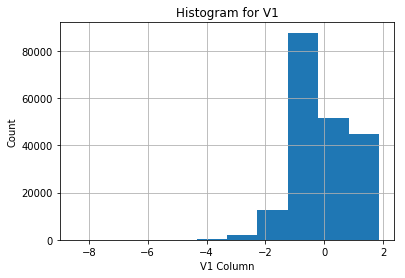

In [35]:
# Plotting the histogram of V1 to check the skewness
plt.xlabel("V1 Column")
plt.ylabel("Count")
plt.title("Histogram for V1")
X_train.V1.hist()
plt.show()

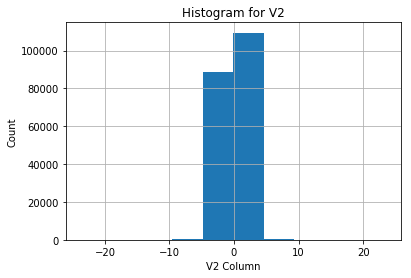

In [36]:
# Plotting the histogram of V2 to check the skewness
plt.xlabel("V2 Column")
plt.ylabel("Count")
plt.title("Histogram for V2")
X_train.V2.hist()
plt.show()

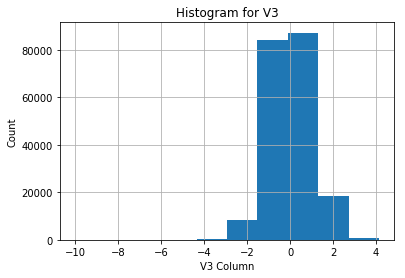

In [37]:
# Plotting the histogram of V3 to check the skewness
plt.xlabel("V3 Column")
plt.ylabel("Count")
plt.title("Histogram for V3")
X_train.V3.hist()
plt.show()

In [38]:
#X_train = X_train.drop(['Time'],axis=1)

## Model Building
- Build different models on the imbalanced dataset and see the result

In [39]:
# Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [40]:
# Feature Selection using RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [41]:
rfe.support_

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False])

In [42]:
# Checking the ranking.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('V1', True, 1),
 ('V2', True, 1),
 ('V3', True, 1),
 ('V4', True, 1),
 ('V5', False, 13),
 ('V6', False, 2),
 ('V7', True, 1),
 ('V8', True, 1),
 ('V9', False, 4),
 ('V10', False, 11),
 ('V11', True, 1),
 ('V12', True, 1),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', True, 1),
 ('V16', True, 1),
 ('V17', False, 12),
 ('V18', False, 6),
 ('V19', True, 1),
 ('V20', False, 14),
 ('V21', True, 1),
 ('V22', True, 1),
 ('V23', False, 7),
 ('V24', False, 3),
 ('V25', False, 15),
 ('V26', False, 8),
 ('V27', False, 9),
 ('V28', False, 10),
 ('Amount', False, 5)]

In [43]:
# Subsetting the columns
col = X_train.columns[rfe.support_]

In [44]:
X_train.columns[~rfe.support_]

Index(['V5', 'V6', 'V9', 'V10', 'V17', 'V18', 'V20', 'V23', 'V24', 'V25',
       'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [45]:
# importing the packages
import statsmodels.api as sm

In [46]:
# Applying logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199348
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -689.63
Date:                Fri, 13 Aug 2021   Deviance:                       1379.3
Time:                        20:10:03   Pearson chi2:                 2.84e+05
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8234      0.167    -52.828      0.000      -9.151      -8.496
V1            -0.1830      0.085     -2.142      0.032      -0.350      -0.016
V2            -0.0883      0.054     -1.639      0.101      -0.194       0.017
V3            -0.3683      0.091     -4.033      0.000      -0.547      -0.189
V4             0.9447      0.093     10.176      0.000       0.763       1.127
V7            -0.1220      0.056     -2.165      0.030      -0.232      -0.012
V8            -0.2130      0.045     -4.735      0.000      -0.301      -0.125
V11            0.1203      0.093      1.288      0.198      -0.063       0.303
V12           -0.6383      0.105     -6.085      0.000      -0.844      -0.433
V13           -0.2493      0.090     -2.756      0.006      -0.427      -0.072
V14           -0.7860      0.074    -10.609      0.000      -0.931      -0.641
V15           -0.2449      0.089     -2.744      0.006      -0.420      -0.070
V16           -0.3278      0.070     -4.688      0.000      -0.465      -0.191
V19           -0.1519      0.077     -1.972      0.049      -0.303      -0.001
V21            0.1865      0.059      3.146      0.002       0.070       0.303
V22            0.2388      0.100      2.384      0.017       0.042       0.435
==============================================================================
"""

In [47]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

222925    0.000175
163811    0.000138
196038    0.000075
25173     0.000048
253792    0.001117
34868     0.000031
43047     0.001147
198445    0.000160
254823    0.001237
125879    0.000114
dtype: float64

In [48]:
# Getting the predicted values on the train set
max(y_train_pred)

0.9999999177064519

In [49]:
# Multiplying the y_train prediction values by hundred to mark the cutoff value.
y_train_pred= y_train_pred * 1000

In [50]:
y_train_pred[:10]

222925    0.174578
163811    0.137683
196038    0.075339
25173     0.047526
253792    1.116610
34868     0.030594
43047     1.147245
198445    0.160459
254823    1.237201
125879    0.113703
dtype: float64

In [51]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,V1,1.28
2,V3,1.18
1,V2,1.12
4,V7,1.08
5,V8,1.08
7,V12,1.06
3,V4,1.03
9,V14,1.03
6,V11,1.02
11,V16,1.02


In [53]:
# There are no variables with multicollinearity. So, there is no need to drop variables on the basis of VIF.

In [54]:
# Making the dataframe of fraud and fraud_prob
y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Fraud_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID
222925,0,0.174578,222925
163811,0,0.137683,163811
196038,0,0.075339,196038
25173,0,0.047526,25173
253792,0,1.116610,253792


In [55]:
y_train_pred_final.describe()

,Fraud,Fraud_Prob,CustID
count,199364.000000,1.993640e+05,199364.000000
mean,0.001725,1.725487e+00,142394.687898
std,0.041503,3.427045e+01,82203.153564
min,0.000000,6.202935e-12,0.000000
25%,0.000000,6.723873e-02,71136.000000
50%,0.000000,1.348030e-01,142340.500000
75%,0.000000,2.941239e-01,213717.250000
max,1.000000,9.999999e+02,284806.000000


In [56]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
222925,0,0.174578,222925,1,1,0,0,0,0,0,0,0,0
163811,0,0.137683,163811,1,1,0,0,0,0,0,0,0,0
196038,0,0.075339,196038,1,0,0,0,0,0,0,0,0,0
25173,0,0.047526,25173,1,0,0,0,0,0,0,0,0,0
253792,0,1.116610,253792,1,1,1,1,1,1,1,1,1,1


In [57]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001725  1.000000  0.000000
0.1   0.1  0.389654  0.991279  0.388614
0.2   0.2  0.640522  0.991279  0.639916
0.3   0.3  0.756606  0.979651  0.756220
0.4   0.4  0.818653  0.970930  0.818390
0.5   0.5  0.856885  0.959302  0.856708
0.6   0.6  0.881829  0.956395  0.881700
0.7   0.7  0.899385  0.950581  0.899297
0.8   0.8  0.912748  0.947674  0.912687
0.9   0.9  0.923116  0.944767  0.923078


In [58]:
#num = [0,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009]

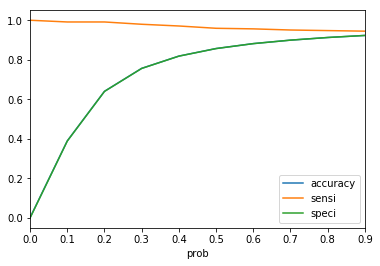

In [59]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [60]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.95 else 0)

y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
222925,0,0.174578,222925,1,1,0,0,0,0,0,0,0,0,0
163811,0,0.137683,163811,1,1,0,0,0,0,0,0,0,0,0
196038,0,0.075339,196038,1,0,0,0,0,0,0,0,0,0,0
25173,0,0.047526,25173,1,0,0,0,0,0,0,0,0,0,0
253792,0,1.116610,253792,1,1,1,1,1,1,1,1,1,1,1


In [61]:
confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.final_predicted )
confusion

array([[184578,  14442],
       [    19,    325]], dtype=int64)

In [62]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.022008532538768878

In [63]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9447674418604651

In [64]:
# The logistic regression is not giving good results in this case

In [65]:
# We will apply the decision tree classifier

In [66]:
# Importing the package
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [68]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

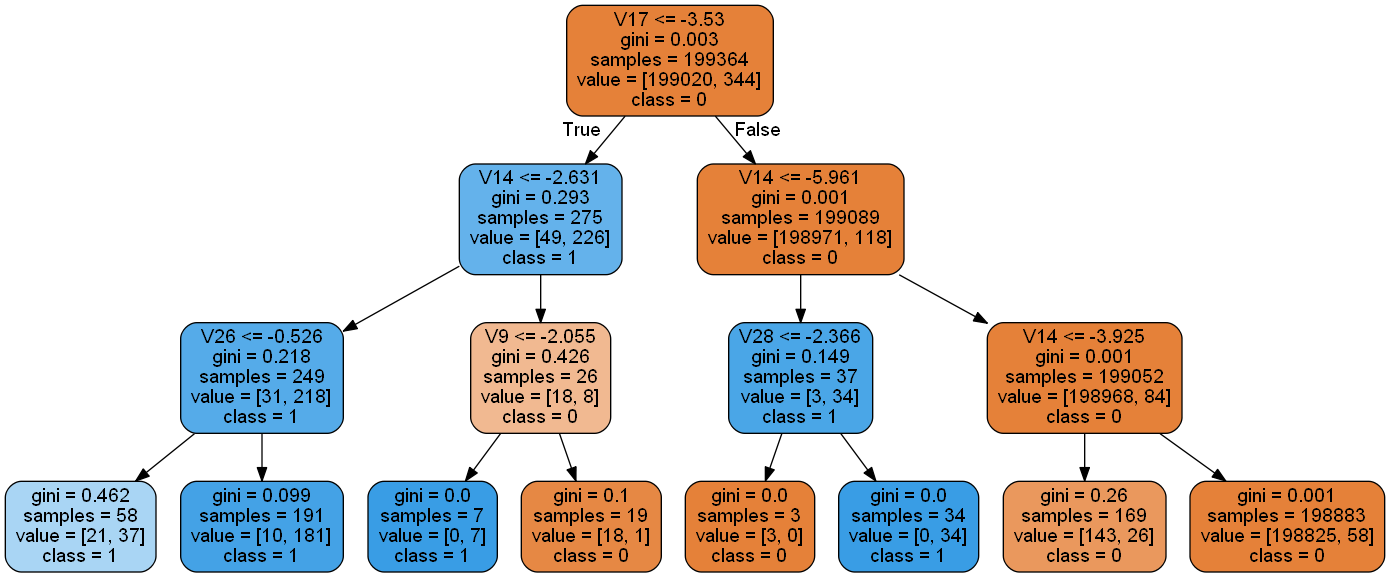

In [69]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['0', "1"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

In [70]:
# Checking the results
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

0.9994181497160972
[[198989     31]
 [    85    259]]
0.9990754069964772
[[85265    30]
 [   49    99]]


In [71]:
# Function for drawing the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

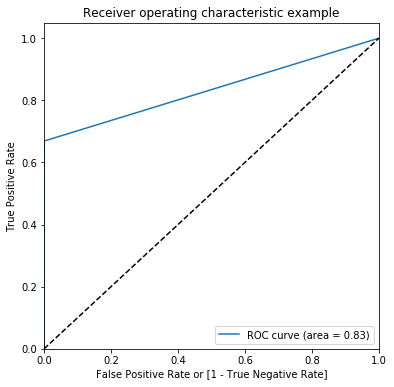

(array([0.00000000e+00, 3.51720499e-04, 1.00000000e+00]),
 array([0.        , 0.66891892, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [72]:
# Plotting the ROC Curve
draw_roc(y_test, y_test_pred)

In [73]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.022008532538768878

In [74]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9447674418604651

In [75]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_test, y_test_pred))

'0.83'

In [76]:
### Hyper-parameter tuning

dt = DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 25],
    'min_samples_leaf': [5, 10, 20, 50, 80],
    'criterion': ["gini", "entropy"]
}


# Instantiate the grid search model which is using cross validation
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)

score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()



Fitting 4 folds for each of 50 candidates, totalling 200 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,2.842210,0.006982,0.026430,0.004960,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.999418,0.999238,0.999258,0.999318,0.999308,0.000070,21
1,4.933789,0.111205,0.048620,0.014917,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.999418,0.999238,0.999258,0.999318,0.999308,0.000070,21
2,4.237181,0.066871,0.046266,0.005281,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.999418,0.999238,0.999258,0.999258,0.999293,0.000073,23
3,4.286527,0.051194,0.027088,0.004983,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.999097,0.999157,0.999177,0.999057,0.999122,0.000048,41
4,3.707260,0.048537,0.024675,0.002353,gini,2,80,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.999238,0.999077,0.999057,0.999077,0.999112,0.000073,46


In [77]:
# Function for evaluating the model.
def evaluate_model(dt_classifier, X_train, y_train):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))    
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    confusion = confusion_matrix(y_test, dt_classifier.predict(X_test))
    print("Precision is")
    print(confusion[1,1]/(confusion[0,1]+confusion[1,1]))
    print("Recall is")
    print(confusion[1,1]/(confusion[1,0]+confusion[1,1]))
    print("ROC AUC Score is")
    print("{:2.2f}".format(metrics.roc_auc_score(y_test, dt_classifier.predict(X_test))))
    
    draw_roc(y_test, dt_classifier.predict(X_test))

In [78]:
#  Finding the best grid search estimator
score_df.nlargest(5,"mean_test_score")

grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

Train Accuracy : 0.9995736441885195
Train Confusion Matrix:
[[199002     18]
 [    67    277]]
--------------------------------------------------
Test Accuracy : 0.9992158515033414
Test Confusion Matrix:
[[85269    26]
 [   41   107]]
Precision is
0.8045112781954887
Recall is
0.722972972972973
ROC AUC Score is
0.86


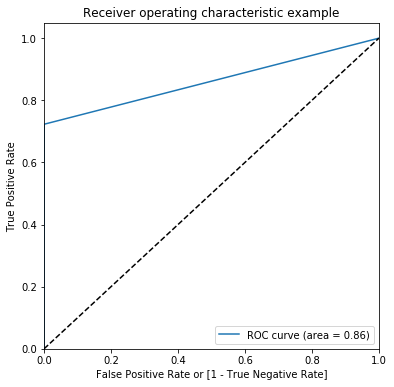

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.72      0.76       148

    accuracy                           1.00     85443
   macro avg       0.90      0.86      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [79]:
# Evaluating the model on best grid_search_estimator

dt_best = grid_search.best_estimator_

evaluate_model(dt_best, X_train, y_train)

from sklearn.metrics import classification_report

print(classification_report(y_test, dt_best.predict(X_test)))

In [80]:
"{:2.2f}".format(metrics.roc_auc_score(y_test, dt_best.predict(X_test)))

'0.86'

In [81]:
dt_best

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

In [82]:
#lncbssk

In [83]:
# Applying XGBoost to our dataset.

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, log_loss, confusion_matrix)

In [85]:
import xgboost as xgb
from xgboost import cv

In [86]:
# Runni

xgb_model = xgb.XGBClassifier()

#hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train, y_train)

C:\Users\hp\asdf\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:21:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [87]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.979655717477884
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [88]:
# Printing the Results on the final model
final_model = xgb.XGBClassifier(learning_rate=0.3,
                                max_depth=6,
                                min_child_weight=1,
                                n_estimators=100)

final_model.fit(X_train, y_train)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=final_model.predict_proba(X_train)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(X_test)[:, 1]))

C:\Users\hp\asdf\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC on train data by XGBoost = 1.0
AUC on test data by XGBoost = 0.9741683473731073


Train Accuracy : 1.0
Train Confusion Matrix:
[[199020      0]
 [     0    344]]
--------------------------------------------------
Test Accuracy : 0.9995318516437859
Test Confusion Matrix:
[[85287     8]
 [   32   116]]
Precision is
0.9354838709677419
Recall is
0.7837837837837838
ROC AUC Score is
0.89


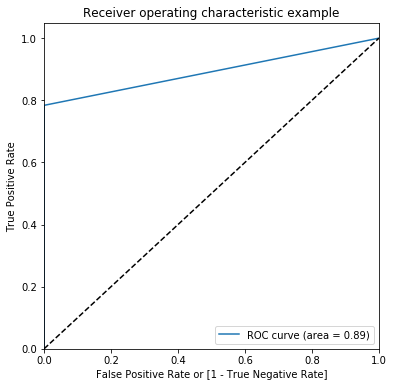

In [89]:
# Evaluating the model using the function we have made
evaluate_model(final_model, X_train, y_train)

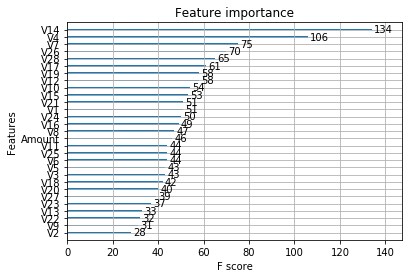

<Figure size 1152x864 with 0 Axes>

In [90]:
# Plotting the important variables
xgb.plot_importance(final_model)
plt.figure(figsize = (16, 12))
plt.show()

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [91]:
clf = final_model

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


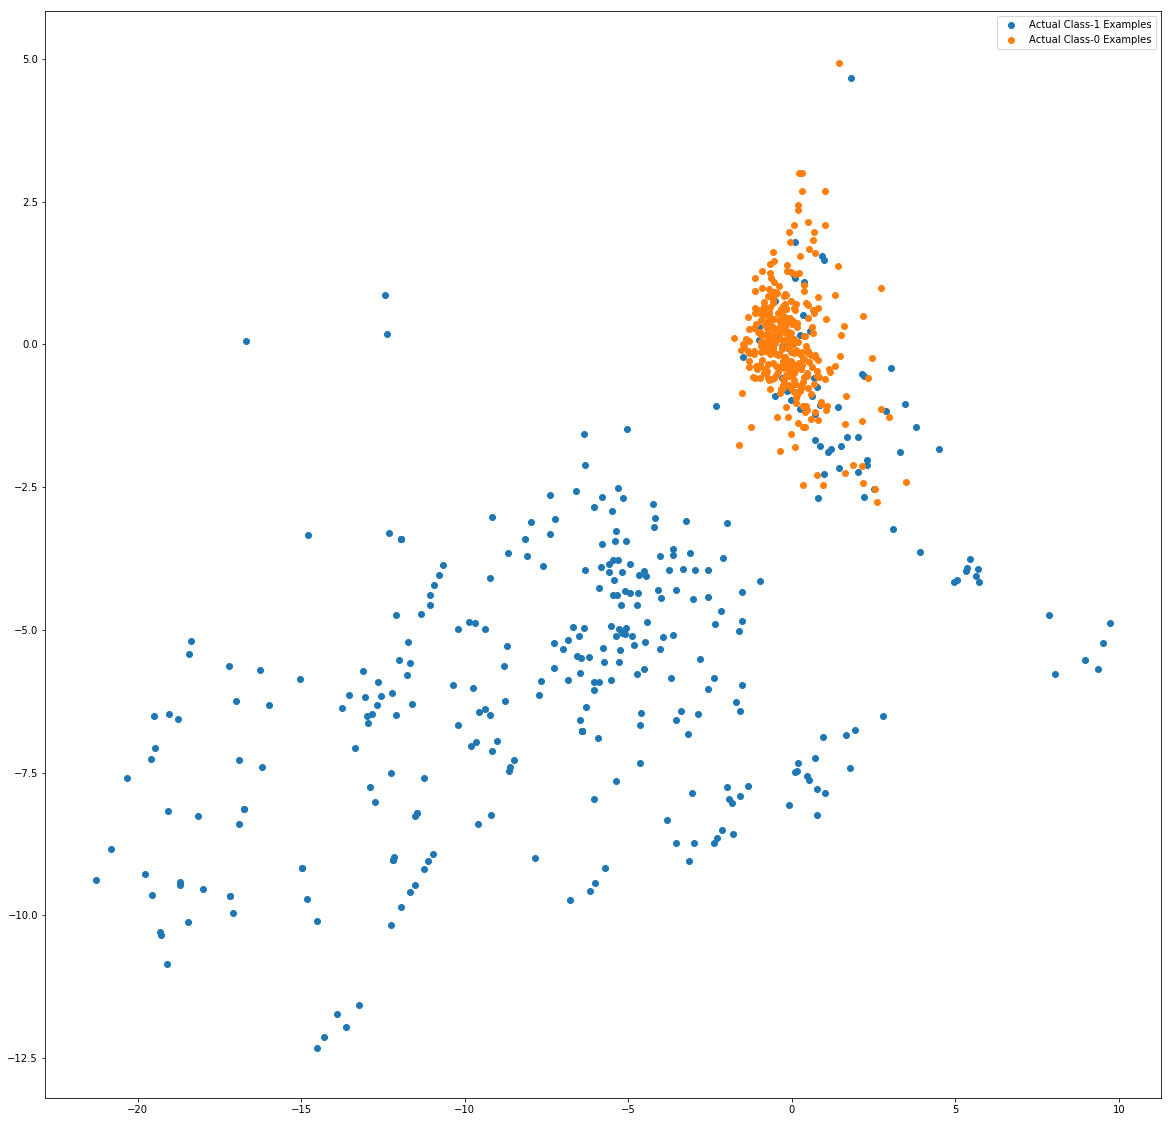

In [92]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [93]:
# Applying Random Forest Classifier

In [94]:
# Importing the packages
from sklearn.ensemble import RandomForestClassifier

In [95]:
# Initializing the Random Forest Classifier Object
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [96]:
# Fitting the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

Train Accuracy : 0.9992074797857186
Train Confusion Matrix:
[[198996     24]
 [   134    210]]
--------------------------------------------------
Test Accuracy : 0.9990519995786665
Test Confusion Matrix:
[[85278    17]
 [   64    84]]
Precision is
0.8316831683168316
Recall is
0.5675675675675675
ROC AUC Score is
0.78


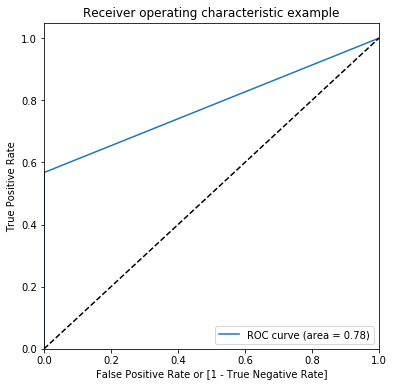

In [97]:
# Evaluating the model.
evaluate_model(rf, X_train, y_train)

In [98]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.022008532538768878

## Model building with balancing Classes

##### Perform class balancing with :
- SMOTE
- ADASYN

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

In [99]:
# Making X_train_smote and Y_train_Smote
import warnings
import imblearn
warnings.filterwarnings("ignore")
from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

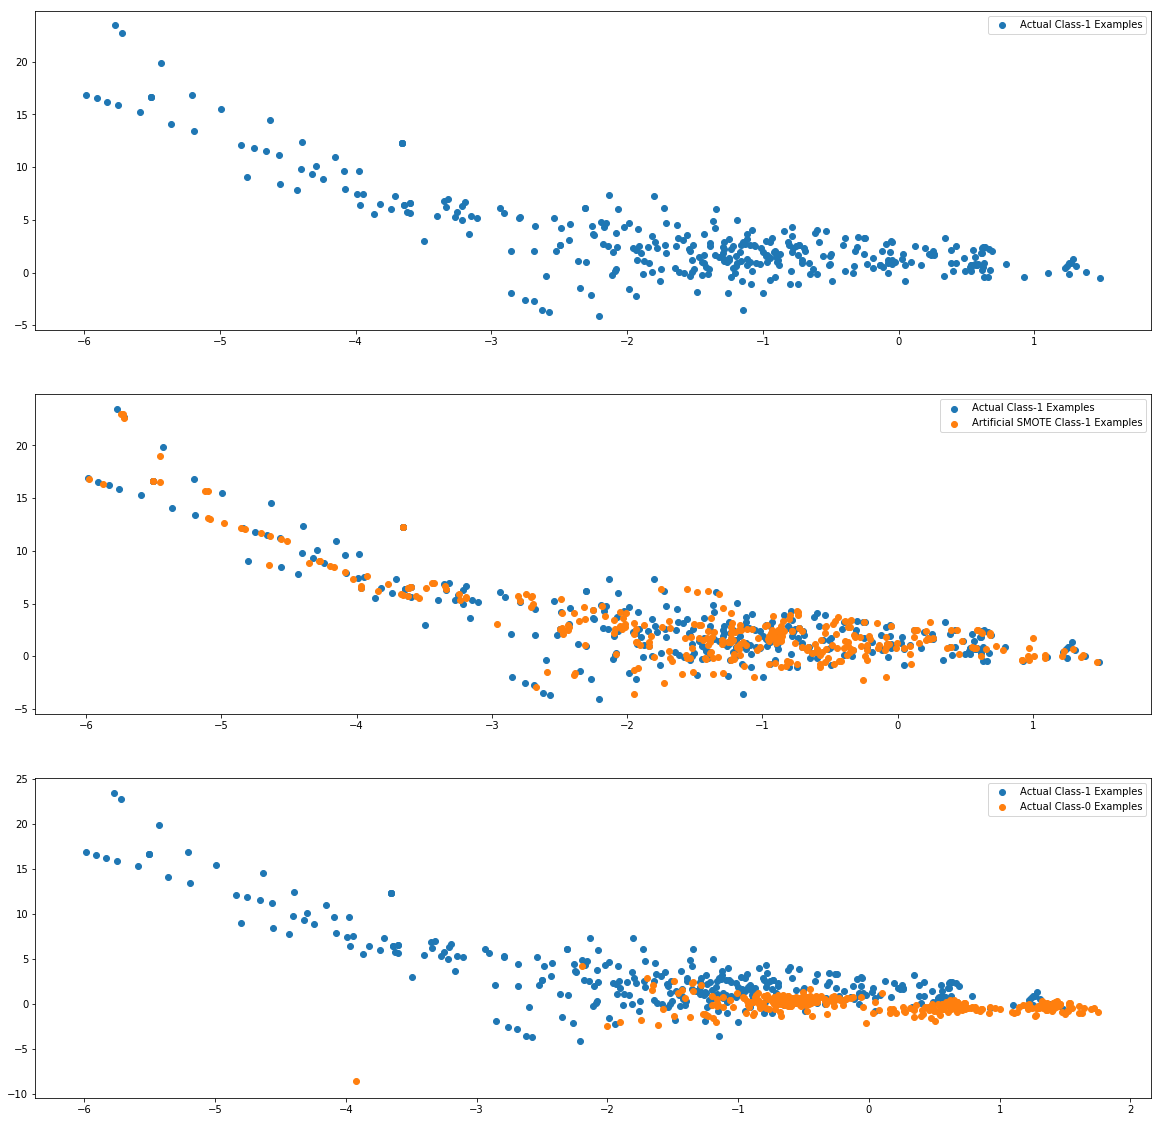

In [100]:
import warnings
import imblearn
warnings.filterwarnings("ignore")
from imblearn import over_sampling

#sm = over_sampling.SMOTE(random_state=0)
#X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]
y_train_smote_1 = y_train_smote[y_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]
X_train_smote_1 = X_train_smote_1.to_numpy()[np.where(y_train_smote_1==1.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
           label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()

In [101]:
# Applying decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=3)

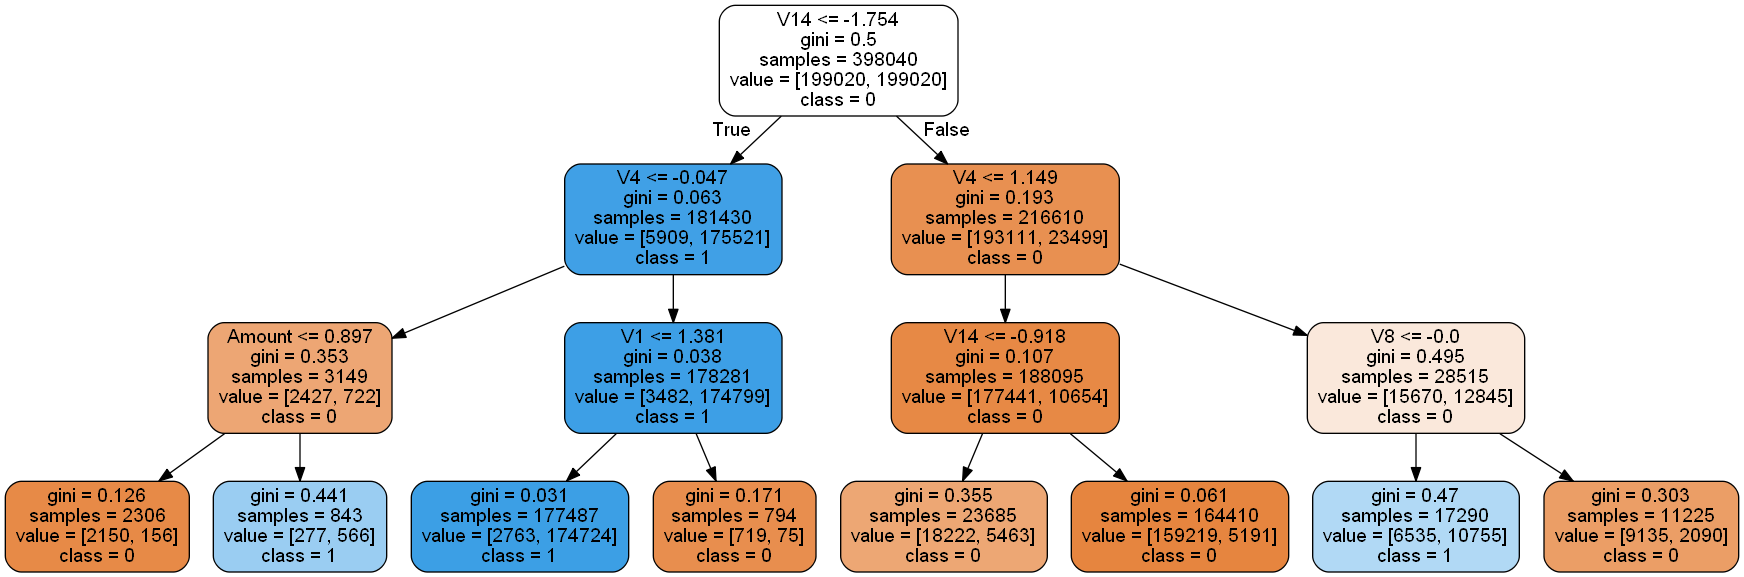

In [102]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['0', "1"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

In [103]:
# Evaluating the model
y_train_pred = dt.predict(X_train_smote)
y_test_pred = dt.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(y_train_smote, y_train_pred))
confusion_matrix(y_train_smote, y_train_pred)

print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9433474022711286
0.9532436829231183


array([[81317,  3978],
       [   17,   131]], dtype=int64)

In [104]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_test, y_test_pred))

'0.92'

In [105]:
# Applying Cross validation and finding the optimum parameters

dt = DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 25],
    'min_samples_leaf': [5, 10, 20, 50, 80],
    'criterion': ["gini", "entropy"]
}


grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train_smote, y_train_smote)

score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()



Fitting 4 folds for each of 50 candidates, totalling 200 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,6.041525,0.083078,0.054245,0.001806,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.930118,0.931796,0.929374,0.930339,0.930406,0.000878,41
1,6.296955,0.039410,0.048845,0.006552,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.930118,0.931796,0.929374,0.930339,0.930406,0.000878,41
2,5.903222,0.037058,0.044325,0.006276,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.930118,0.931796,0.929374,0.930339,0.930406,0.000878,41
3,6.378783,0.046377,0.044383,0.006782,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.930118,0.931796,0.929374,0.930339,0.930406,0.000878,41
4,5.809168,0.030768,0.045103,0.003532,gini,2,80,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.930118,0.931796,0.929374,0.930339,0.930406,0.000878,41


In [106]:
# Printing the best estimator after cross validation and hyperparameter tuning.
score_df.nlargest(5,"mean_test_score")

grid_search.best_estimator_



DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=5,
                       random_state=42)

Train Accuracy : 0.9994548286604361
Train Confusion Matrix:
[[198882    138]
 [    79 198941]]
--------------------------------------------------
Test Accuracy : 0.9969453319757031
Test Confusion Matrix:
[[85061   234]
 [   27   121]]
Precision is
0.3408450704225352
Recall is
0.8175675675675675
ROC AUC Score is
0.91


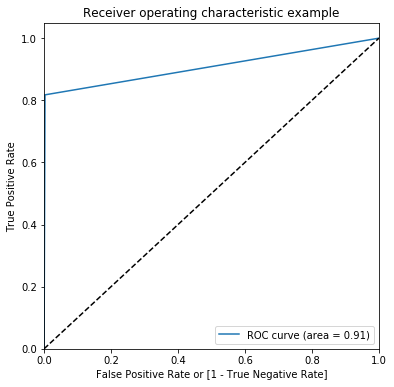

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.34      0.82      0.48       148

    accuracy                           1.00     85443
   macro avg       0.67      0.91      0.74     85443
weighted avg       1.00      1.00      1.00     85443



In [107]:
# Evaluating the metric
dt_best = grid_search.best_estimator_

evaluate_model(dt_best, X_train_smote, y_train_smote)

from sklearn.metrics import classification_report

print(classification_report(y_test, dt_best.predict(X_test)))

In [108]:
# Checking the ROC AUC Score
"{:2.2f}".format(metrics.roc_auc_score(y_test, dt_best.predict(X_test)))

'0.91'

In [109]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, dt_best.predict(X_test) )
confusion

array([[85061,   234],
       [   27,   121]], dtype=int64)

In [110]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.3408450704225352

In [111]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8175675675675675

In [112]:
# Applying random forest on SMOTE data
from sklearn.ensemble import RandomForestClassifier

In [113]:
# Random Forest Object
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [114]:
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

Train Accuracy : 0.9322706260677319
Train Confusion Matrix:
[[197312   1708]
 [ 25251 173769]]
--------------------------------------------------
Test Accuracy : 0.9907423662558665
Test Confusion Matrix:
[[84525   770]
 [   21   127]]
Precision is
0.1415830546265329
Recall is
0.8581081081081081
ROC AUC Score is
0.92


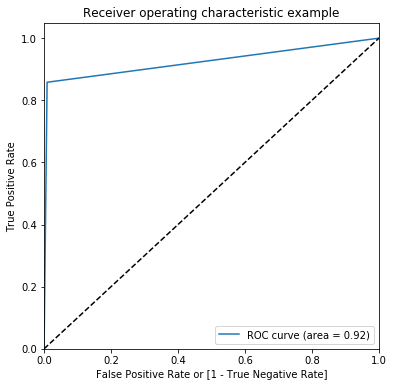

In [115]:
# Evaluating the model using the function
evaluate_model(rf, X_train_smote, y_train_smote)

In [116]:
# Applying XG Boost model on the Smote data

In [117]:
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_smote, y_train_smote)

[20:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [118]:
# Finding the best parameters
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9999882849992701
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [119]:
# Finding the AUC_ROC score on the train and test dat.
final_model = xgb.XGBClassifier(learning_rate=0.3,
                                max_depth=6,
                                min_child_weight=1,
                                n_estimators=100)

final_model.fit(X_train_smote, y_train_smote)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_smote,
                                                              y_score=final_model.predict_proba(X_train_smote)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(X_test)[:, 1]))

[20:52:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC on train data by XGBoost = 1.0
AUC on test data by XGBoost = 0.9776352499988118


Train Accuracy : 1.0
Train Confusion Matrix:
[[199020      0]
 [     0 199020]]
--------------------------------------------------
Test Accuracy : 0.9992626663389628
Test Confusion Matrix:
[[85257    38]
 [   25   123]]
Precision is
0.7639751552795031
Recall is
0.831081081081081
ROC AUC Score is
0.92


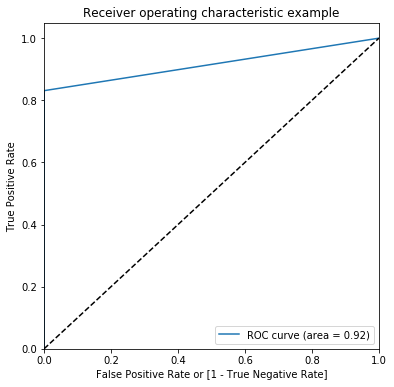

In [120]:
# Evaluating the model using the function
evaluate_model(final_model, X_train_smote, y_train_smote)

In [121]:
# After running the whole code, we see that this is best model as the ROC_AUC Score is 0.92, precision is 0.76 and recall is 
# 0.83
best_model = final_model

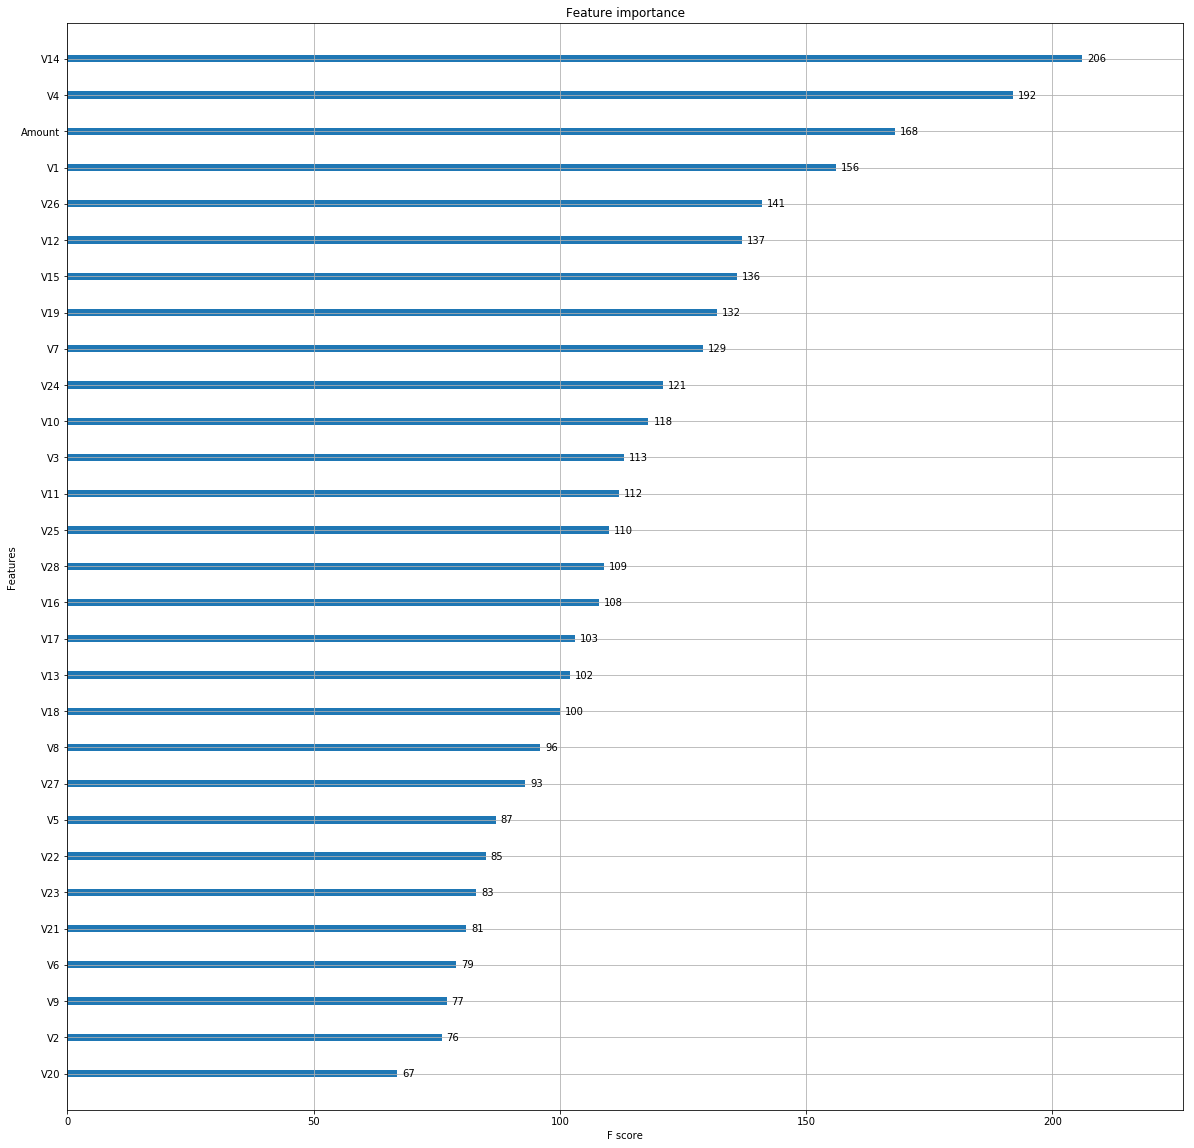

<Figure size 1152x864 with 0 Axes>

In [122]:
# Plot the important variables of the model
xgb.plot_importance(final_model)
plt.figure(figsize = (16, 12))
plt.show()

In [123]:
# Applying the ADASYN Transformation
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

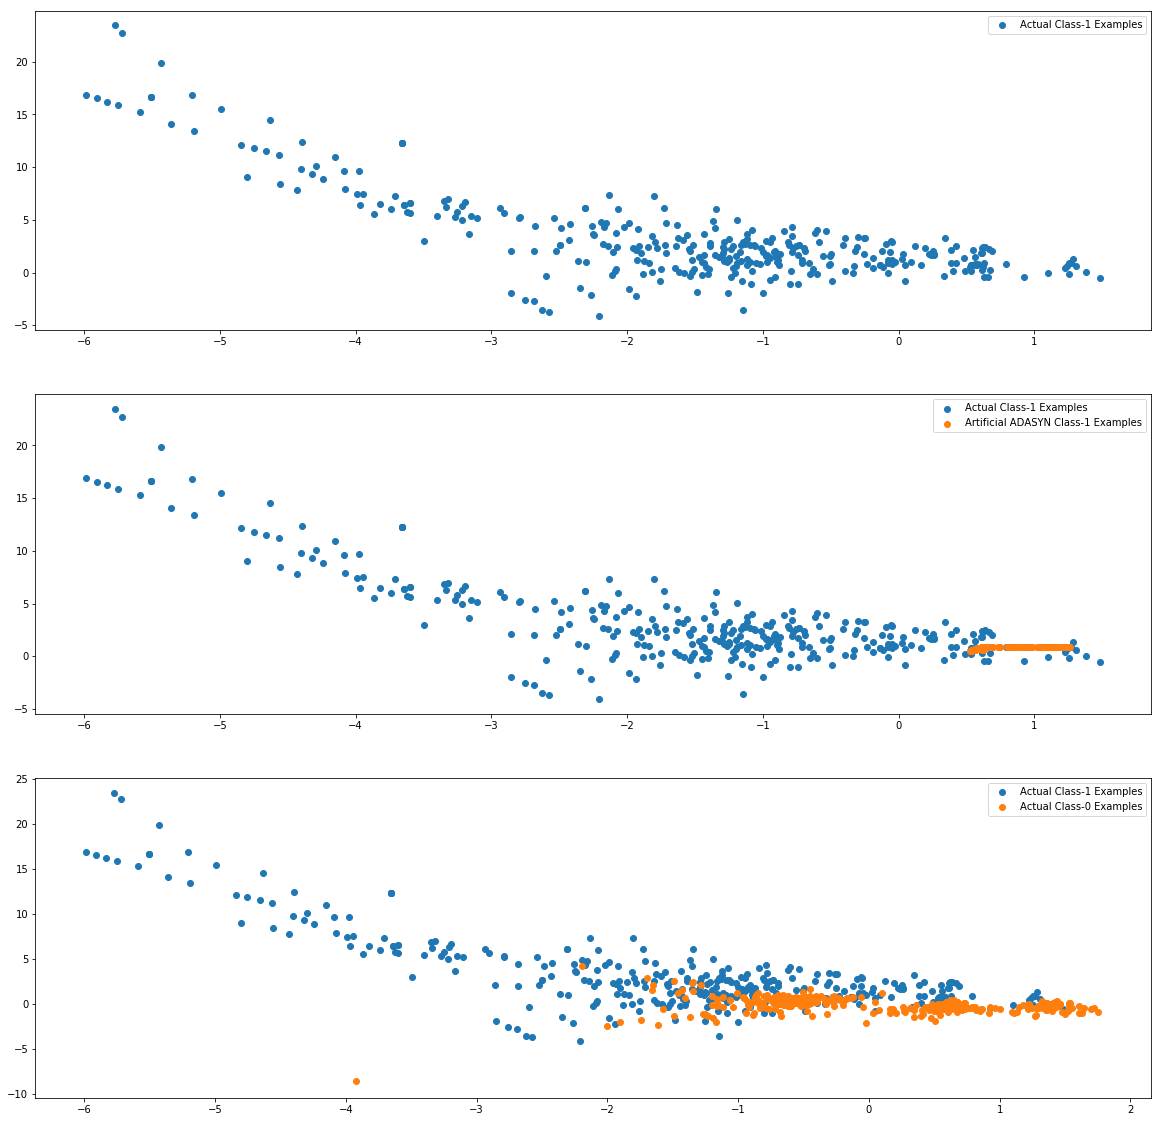

In [124]:
# Plotting data created by ADASYN
import warnings
import imblearn
warnings.filterwarnings("ignore")
from imblearn import over_sampling

X_train_ada_1 = X_train_ada[X_train.shape[0]:]
y_train_ada_1 = y_train_ada[y_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]
X_train_ada_1 = X_train_ada_1.to_numpy()[np.where(y_train_ada_1==1.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ada_1[:X_train_1.shape[0], 0], X_train_ada_1[:X_train_1.shape[0], 1],
           label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()

In [125]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_ada, y_train_ada)

DecisionTreeClassifier(max_depth=3)

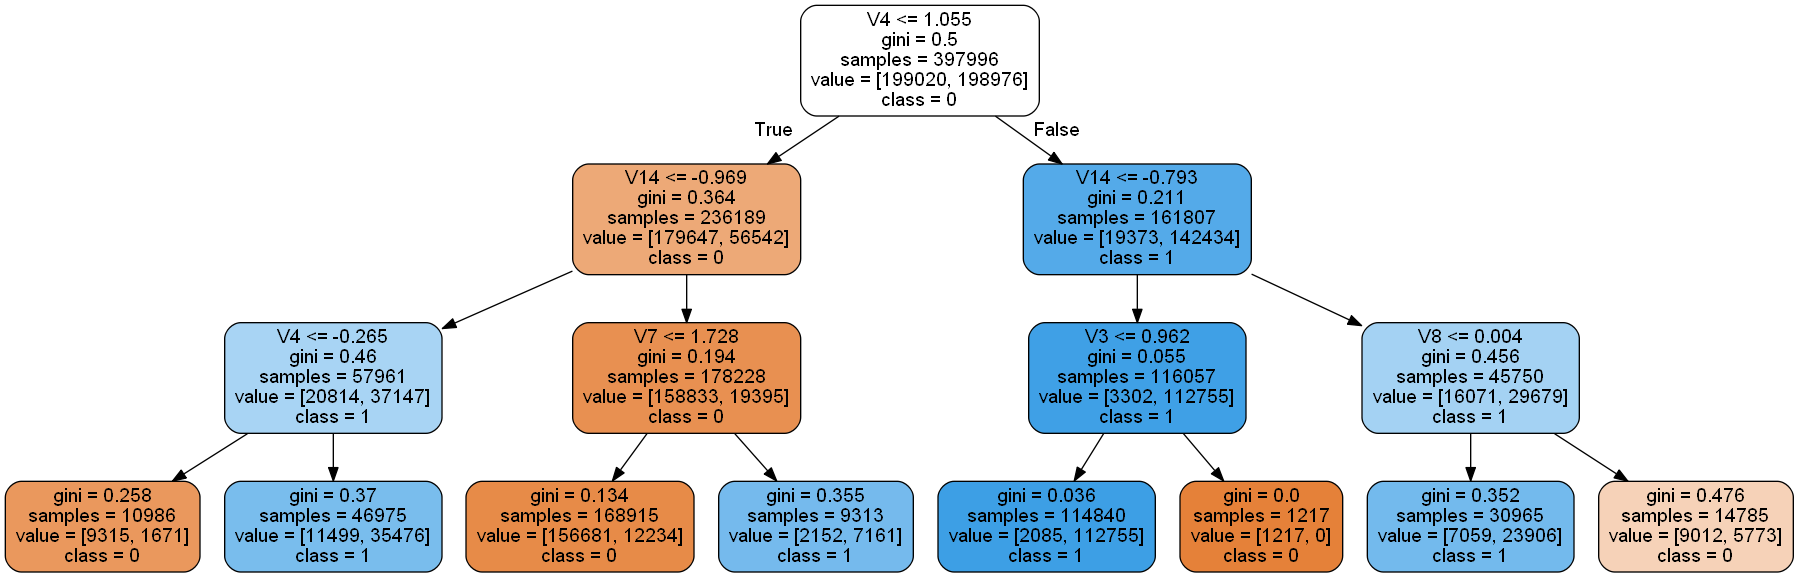

In [126]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['0', "1"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

In [127]:
y_train_pred = dt.predict(X_train_ada)
y_test_pred = dt.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(y_train_ada, y_train_pred))
confusion_matrix(y_train_ada, y_train_pred)

print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.8932828470637896
0.8886743208922908


array([[75796,  9499],
       [   13,   135]], dtype=int64)

In [128]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_test, y_test_pred))

'0.90'

In [129]:
### Hyper-parameter tuning

dt = DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

# Cross validation along with Hyperparameter Tuning
params = {
    'max_depth': [2, 3, 5, 10, 25],
    'min_samples_leaf': [5, 10, 20, 50, 80],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


grid_search.fit(X_train_ada, y_train_ada)

score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

Fitting 4 folds for each of 50 candidates, totalling 200 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,5.798279,0.041625,0.045629,0.005054,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.840652,0.856923,0.883918,0.852702,0.858549,0.015817,36
1,6.251598,0.027858,0.043909,0.006090,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.840652,0.856923,0.883918,0.852702,0.858549,0.015817,36
2,5.798247,0.059666,0.042636,0.002854,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.840652,0.856923,0.883918,0.852702,0.858549,0.015817,36
3,5.727678,0.052239,0.048371,0.007741,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.840652,0.856923,0.883918,0.852702,0.858549,0.015817,36
4,6.316354,0.065713,0.040143,0.002853,gini,2,80,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.840652,0.856923,0.883918,0.852702,0.858549,0.015817,36


In [130]:
score_df.nlargest(5,"mean_test_score")
# Printing the best estimator after cross validation and Hyperparameter Tuning
grid_search.best_estimator_



DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=80,
                       random_state=42)

Train Accuracy : 0.9745851717102685
Train Confusion Matrix:
[[189859   9161]
 [   954 198022]]
--------------------------------------------------
Test Accuracy : 0.9527521271490935
Test Confusion Matrix:
[[81275  4020]
 [   17   131]]
Precision is
0.03155866056371959
Recall is
0.8851351351351351
ROC AUC Score is
0.92


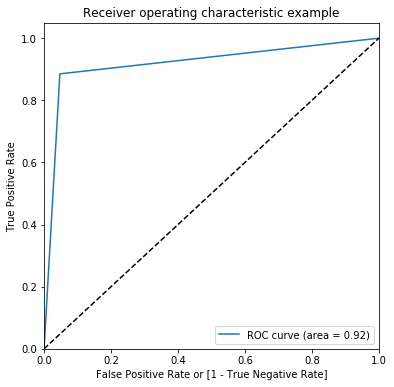

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85295
           1       0.03      0.89      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.92      0.52     85443
weighted avg       1.00      0.95      0.97     85443



In [131]:
dt_best = grid_search.best_estimator_

evaluate_model(dt_best, X_train_ada, y_train_ada)

from sklearn.metrics import classification_report

print(classification_report(y_test, dt_best.predict(X_test)))

In [132]:
"{:2.2f}".format(metrics.roc_auc_score(y_test, dt_best.predict(X_test)))

'0.92'

In [133]:
# Confusion Metrics
confusion = metrics.confusion_matrix(y_test, dt_best.predict(X_test) )
confusion

array([[81275,  4020],
       [   17,   131]], dtype=int64)

In [134]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.03155866056371959

In [135]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8851351351351351

In [136]:
#ppp

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
# Random Forest Object
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [139]:
# Random Forest fit
rf.fit(X_train_ada, y_train_ada)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

Train Accuracy : 0.8579985728499784
Train Confusion Matrix:
[[185439  13581]
 [ 42935 156041]]
--------------------------------------------------
Test Accuracy : 0.9333005629483984
Test Confusion Matrix:
[[79611  5684]
 [   15   133]]
Precision is
0.02286401925391095
Recall is
0.8986486486486487
ROC AUC Score is
0.92


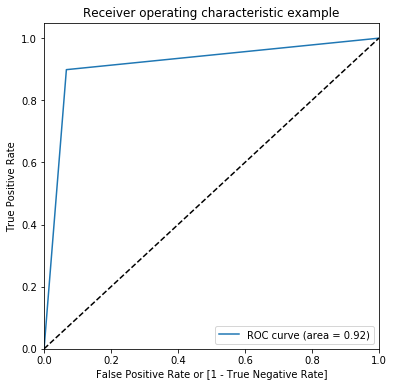

In [140]:
# Evaluating the model
evaluate_model(rf, X_train_ada, y_train_ada)

In [141]:
# Performing XGBoost Classification

In [142]:
xgb_model = xgb.XGBClassifier()

# hyperparameter tuning along with cross validation.
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_ada, y_train_ada)

[21:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [143]:
# Printing the best parameters
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9894771173522589
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [144]:
# Choosing the best parameter to fit the model
final_model = xgb.XGBClassifier(learning_rate=0.3,
                                max_depth=6,
                                min_child_weight=1,
                                n_estimators=100)

final_model.fit(X_train_ada, y_train_ada)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_ada,
                                                              y_score=final_model.predict_proba(X_train_ada)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(X_test)[:, 1]))

[21:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC on train data by XGBoost = 0.9999999999999999
AUC on test data by XGBoost = 0.9727368290971081


Train Accuracy : 1.0
Train Confusion Matrix:
[[199020      0]
 [     0 198976]]
--------------------------------------------------
Test Accuracy : 0.9991924440855307
Test Confusion Matrix:
[[85253    42]
 [   27   121]]
Precision is
0.7423312883435583
Recall is
0.8175675675675675
ROC AUC Score is
0.91


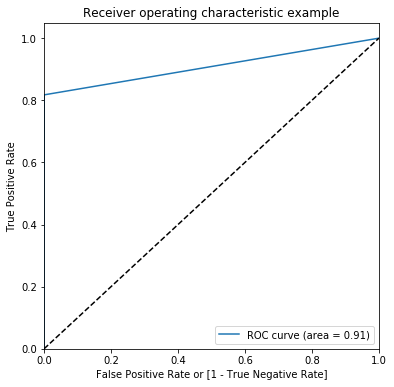

In [145]:
# Evaluating the model using the function made by us.
evaluate_model(final_model, X_train_ada, y_train_ada)

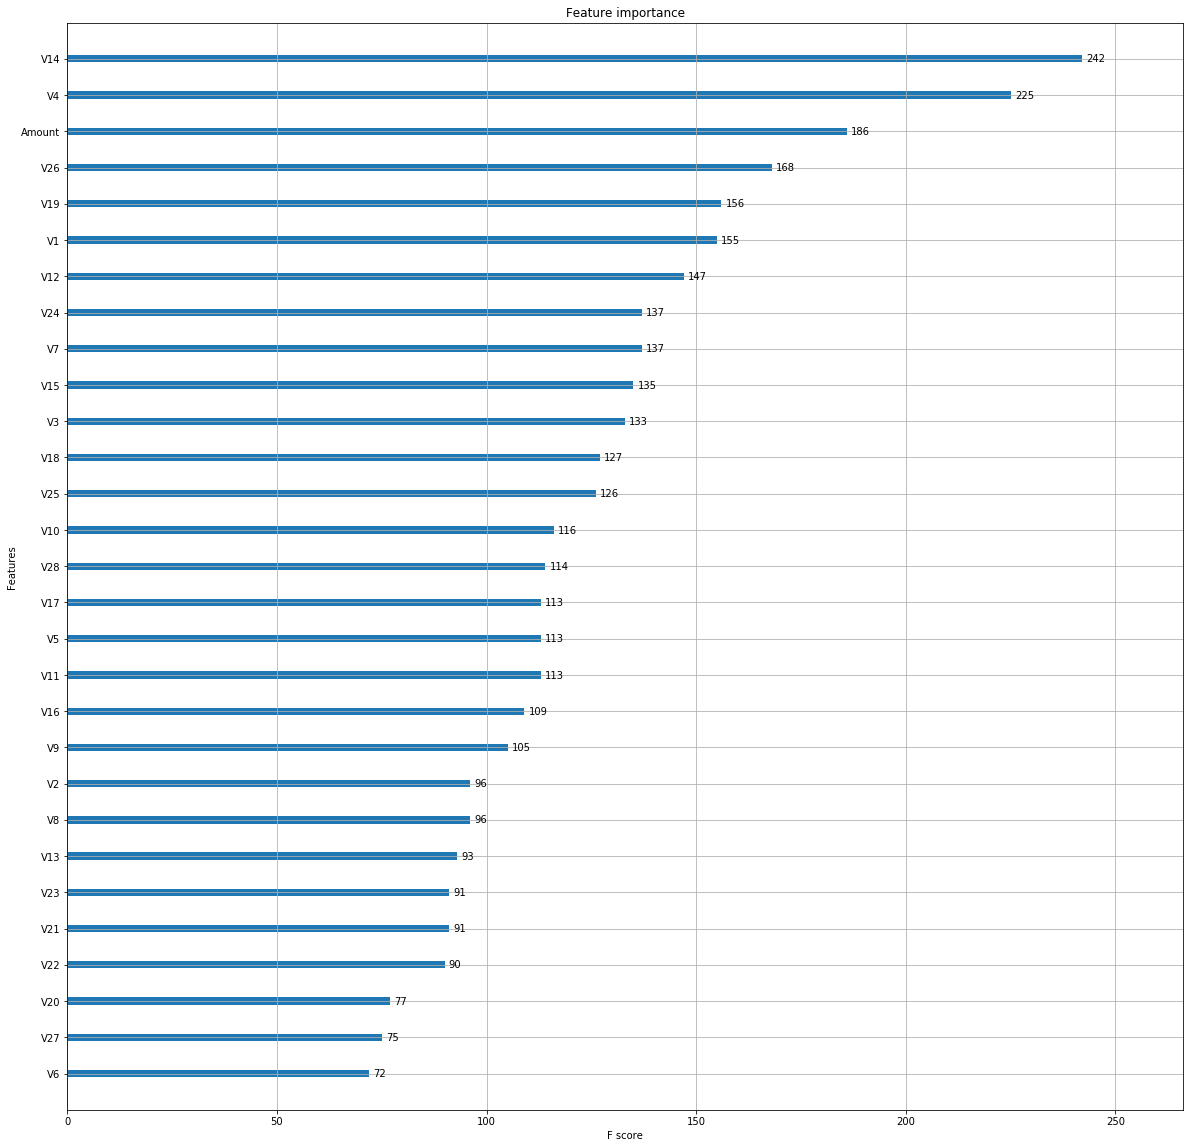

<Figure size 1152x864 with 0 Axes>

In [146]:
# Plotting the Important variables from XGBoost model.
xgb.plot_importance(final_model)
plt.figure(figsize = (16, 12))
plt.show()

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


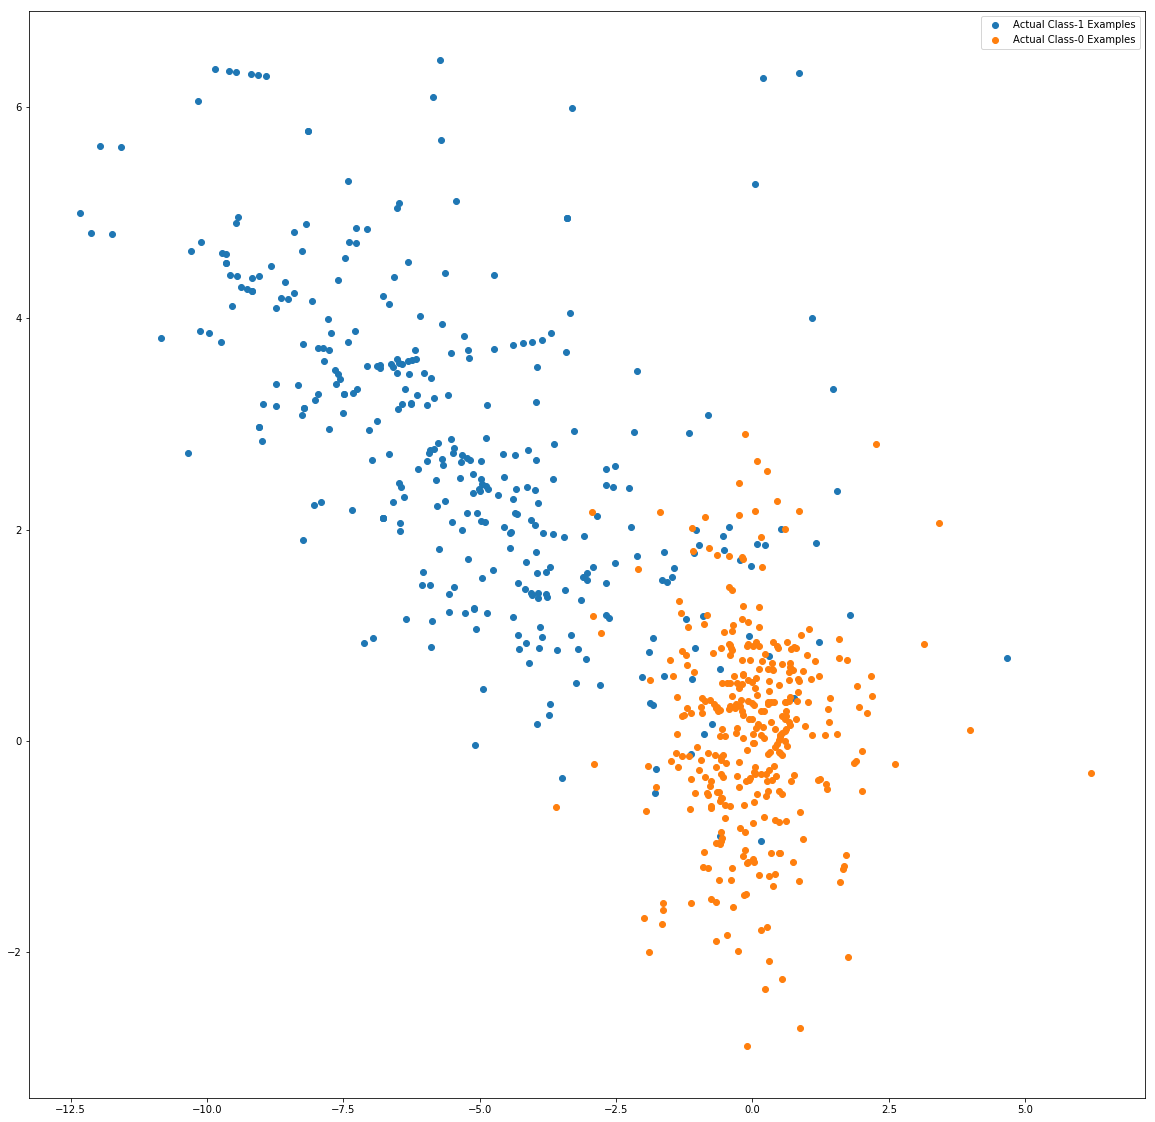

In [147]:
clf = best_model
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# After running the whole code, we see that XGBoost model after applying SMOTE with the optimum hyperparameters is best model
# as the ROC_AUC Score is 0.92, precision is 0.76 and recall is 0.83. The model is named as "best_model". The ROC_AUC Score,
# precision and recall are the most accurate metrics in this case of imbalanced dataset.